# Introduction

In Merge Sort vs Insertion Sort (./"Merge_sort_vs_Insertion_sort.ipynb"), we observed that insertion sort is faster for smaller input sizes while merge sort is faster for larger input sizes. Given the results from that experiment, we will try to build a hybrid sorting algorithm that combines the two (called Tim sort). When we recurse in Merge sort, if a partition size is less than or equal to some constant $k$, we should use insertion sort, but if it is greater than $k$ we should continue with Merge sort.  We will experimentally determine what value of $k$ will optimize speed.

# Hypothesis

The value of $k$ that will optimize speed will be the same as the crossover point from the Merge Sort vs Insertion Sort experiment. This is because insertion sort is more efficient than merge sort for input sizes less than the crossover point, so the hybrid sort will be most efficient if $k$ is equal to that very value of input size.

# Methods

We import the necessary modules for our experiment

In [1]:
import timeit # To time our algorithm
import random # To generate random lists
import matplotlib.pyplot as plt # To generate the plots

## Insertion sort implementation

In [2]:
def insertion_sort(seq):
    '''Iterative implementation of insertion sort'''
    for i in range(1, len(seq)):
        curr = seq[i]
        j = i - 1
        while j >= 0 and seq[j] > curr:
            seq[j + 1] = seq[j]
            j -= 1
        seq[j + 1] = curr

    return seq

## Tim sort implementation

We implement the hybrid Tim sort as described in the introduction.

In [7]:
def tim_sort(seq, k):
    '''Recursive implementation of tim sort'''
    if len(seq) <= 1: # already sorted
        return seq
    elif len(seq) <= k: # if input size small enough, use insertion sort
        return insertion_sort(seq)
    
    def tim_sort_helper(left, right):
        '''Merging back the split sequences'''
        res = []
        i = 0
        j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                res.append(left[i])
                i += 1
            else:
                res.append(right[j])
                j += 1

        res += left[i:]
        res += right[j:]
        return res

    
    # split the sequence
    mid = len(seq) // 2
    left = tim_sort(seq[:mid], k)
    right = tim_sort(seq[mid:], k)
    
    return tim_sort_helper(left, right)


## Running tim sort with varying values of k

We run tim sort on a randomly generated sequence of fixed length and change the value of k over a wide range. We record the average execution time of 10 iterations of the sort for each value of k in a list. 

In [8]:
execution_times = []
seq_length = 10000
seq = []
k_values = []

for i in range(10000):
    seq.append(random.randint(0, seq_length))
    
for k in range(0, 200, 10):
    k_values.append(k)
    start_time = timeit.default_timer()
    for i in range(10):    
        sorted_seq = tim_sort(seq, k)
    execution_time = timeit.default_timer() - start_time
    execution_times.append(execution_time / 10)
    

# Results

We plot the execution times for each value of k.

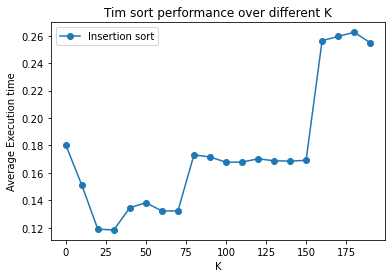

In [9]:
plt.plot(k_values, execution_times, label='Insertion sort', marker='o')

# Adding labels and title
plt.xlabel('K')
plt.ylabel('Average Execution time')
plt.title('Tim sort performance over different K')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# Discussion

From the above graph, the observed value of k for which the average execution time is minimum is around $25$ to $30$. The graph reaches a absolute minima at this point and proceeds to increase with the value of k beyond it.

The value of k is within the range of the crossover point from Merge Sort vs Insertion sort. These results, therefore, support our hypothesis.

One challenge when conducting this experiment was finding a precise value of $k$. In future, I might run a few more experiments near the range of $k$ where the absolute minima occurs in order to narrow it down or perhaps find an exact critical point.

# Conclusion

Under the conditions tested, the hybrid Tim sort was fastest when $k$ had a value between $25$ to $30$.